# Exercise 1: 

## Part A: Reading Raster and Vector data, visualize the data in Python

Data files:

(1) raster “image.tif”

(2) ground truth stream line “clippedRefinedLines.shp”

Target output or effect:

(1)	Visualization

(a)	Can you visualize each layer of the image.tif separately?

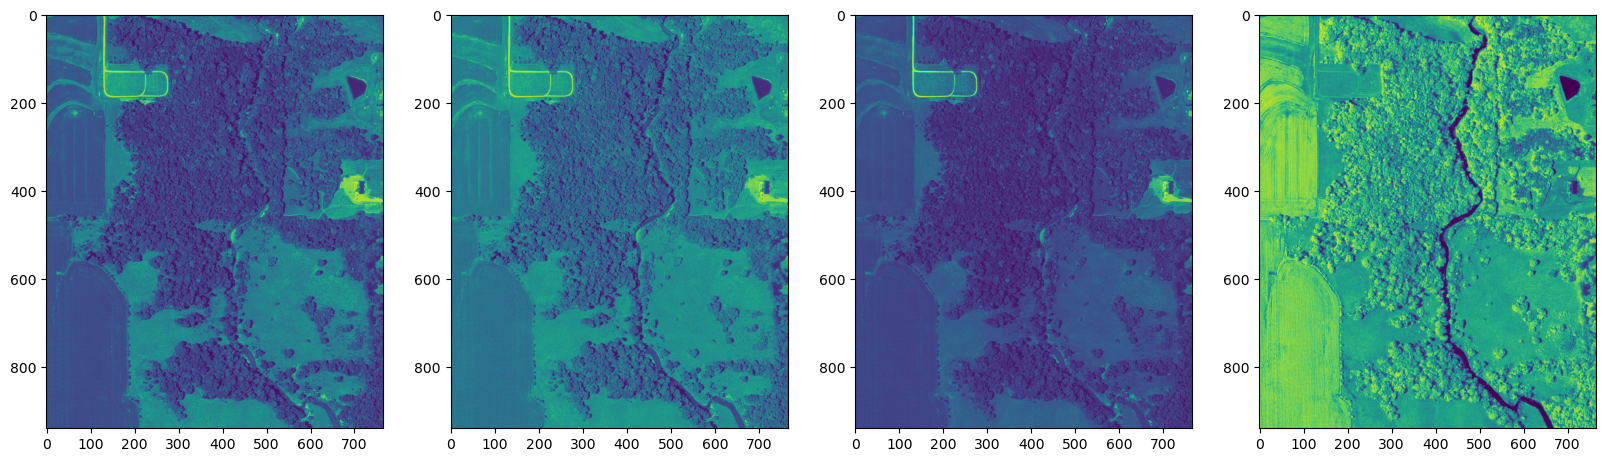

In [2]:
import rioxarray
import matplotlib.pyplot as plt

IMAGE_FILE_PATH = "Data/Image.tif"

image = rioxarray.open_rasterio(IMAGE_FILE_PATH)

num_bands = len(image.band.values)
fig, ax = plt.subplots(1, num_bands, figsize=(20, 20))

for band in range(num_bands):
    ax[band].imshow(image[band, :, :])

Can you visualize RGB (first three) layers together in true color?

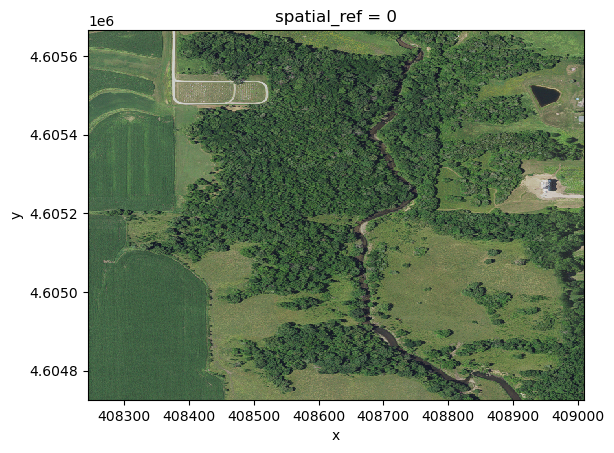

In [3]:
import numpy as np

image[:-1, :, :].astype(np.uint8).plot.imshow()

(b)	Can you visualize RGB layer together (with polyline on top of raster)? (skip this if needed)

Note: when visualizing the raster image in true color, only use the first three bands on red, green, and blue channels. The fourth channel is near-infra-red band (invisible by eye).

<AxesSubplot: title={'center': 'spatial_ref = 0'}, xlabel='x', ylabel='y'>

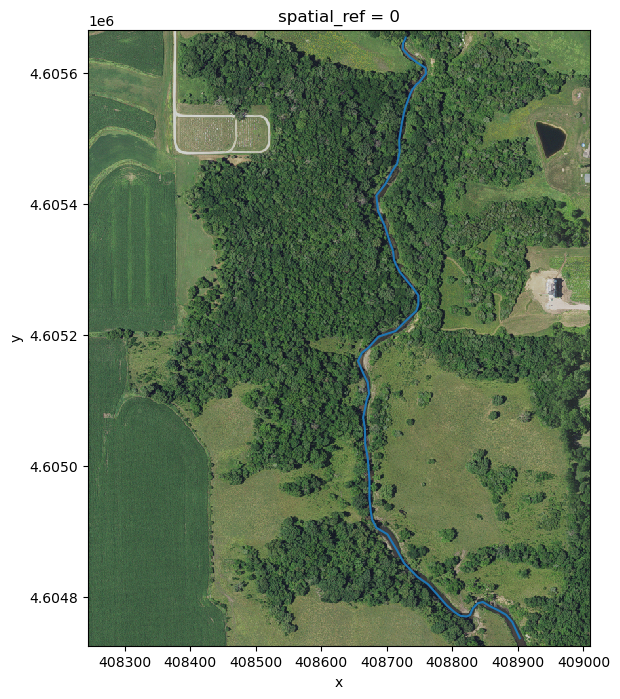

In [4]:
import geopandas as gpd
import xarray as xr
from rasterio import features

POLYLINE_FILE_PATH = "Data/clippedRefinedLines.shp"

polyline = gpd.read_file(POLYLINE_FILE_PATH)
polyline_to_image_crs = polyline.to_crs(image.rio.crs)

fig, ax = plt.subplots()
fig.set_size_inches((8, 8))

image[:-1, :, :].astype(np.uint8).plot.imshow(ax=ax)
polyline_to_image_crs.plot(ax=ax)

(2)	Print some summary statistics

(a)	What are the spatial reference systems for both files


In [5]:
print(image.rio.crs) # <CRS printed>
print(polyline.crs) # epsg:4269

PROJCS["UTM_Zone_15_Northern_Hemisphere",GEOGCS["GCS_GRS_1980_IUGG_1980",DATUM["D_unknown",SPHEROID["GRS80",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-93],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
epsg:4269


(b)	how many row/column/total pixels in raster image

In [6]:
print(image.shape) # (4, 940, 766) -> 940 rows, 766 columns
print(image.shape[-2] * image.shape[-1]) # 720,040 pixels total

(4, 940, 766)
720040


(c)	What is the spatial extent of the image

In [7]:
print(image.rio.bounds()) # (408244.0, 4604726.0, 409010.0, 4605666.0)

(408244.0, 4604726.0, 409010.0, 4605666.0)


(d)	How many bands in the raster image

In [8]:
print(len(image.band.values)) # 4

4


(e)	What are the values of all bands for the first 100 pixels in the raster image 

In [9]:
print(image[0, 0, :100].values)
"""[113. 111. 126. 125. 120. 130. 117. 112.  99. 102.  97.  99. 101. 117.
 126. 131. 126. 148. 155. 138. 136. 150. 160. 166. 160. 166. 168. 159.
 151. 144. 140. 124. 100.  84.  78.  72.  71.  80.  69.  72.  74.  74.
  80.  71.  89.  77.  71.  75.  68.  67.  76.  80.  77.  67.  73. 111.
 145. 143. 122.  87.  70.  67.  71.  76.  81.  76.  89.  68.  69.  78.
  70.  68.  62.  71.  72.  83.  71.  82.  74.  79.  71.  75.  68.  69.
  75.  69.  83.  85.  69. 100. 112. 114.  95.  76.  72.  77.  71.  85.
  83.  84.]"""

print(image[1, 0, :100].values)
"""[

152. 152. 153. 151. 150. 150. 138. 134. 133. 134. 128. 135. 135. 134.
 127. 128. 132. 144. 142. 140. 142. 144. 151. 157. 152. 158. 153. 148.
 139. 133. 132. 129. 112. 116. 114. 105.  95. 112. 101. 102. 105.  97.
 105. 107. 116.  97.  97. 102. 101.  99. 102. 109. 109. 108. 104. 120.
 135. 135. 122. 114. 102. 100. 107. 107. 116. 103. 107. 104.  96. 106.
 106.  96.  95.  97.  94. 102. 103. 114.  96.  98.  98. 100. 100.  96.
 103. 101. 107. 105.  96.  94. 116. 120. 111. 110. 106. 101.  99. 108.
 106. 106.]"""

print(image[2, 0, :100].values)
"""[101. 100. 103. 107. 101. 108. 101.  96.  99.  94.  91.  89.  92.  94.
 100. 102.  97. 113. 114. 103. 107. 111. 116. 131. 121. 127. 127. 124.
 113. 111. 105. 105.  86.  77.  76.  70.  67.  80.  72.  73.  79.  67.
  77.  77.  82.  70.  75.  75.  73.  68.  69.  81.  76.  71.  69.  90.
 112. 112. 101.  75.  73.  67.  70.  74.  84.  73.  81.  72.  77.  75.
  74.  72.  66.  73.  70.  78.  76.  79.  75.  75.  69.  70.  70.  70.
  75.  74.  77.  78.  75.  81.  95.  96.  85.  77.  72.  73.  71.  79.
  73.  75.]"""

print(image[3, 0, :100].values)
"""[192. 198. 199. 196. 188. 187. 163. 156. 153. 145. 144. 150. 149. 135.
 117. 114. 119. 112. 106. 119. 122. 116. 117. 113. 118. 109. 106. 107.
 110. 116. 121. 134. 136. 173. 183. 180. 174. 191. 181. 172. 183. 180.
 178. 188. 190. 179. 177. 177. 180. 179. 179. 193. 187. 169. 157. 150.
 146. 147. 175. 184. 164. 175. 188. 185. 179. 181. 187. 184. 176. 179.
 181. 166. 170. 173. 155. 171. 185. 188. 163. 175. 180. 180. 170. 161.
 175. 168. 181. 185. 146. 136. 141. 139. 154. 161. 172. 179. 165. 158.
 168. 153.]"""

[113. 111. 126. 125. 120. 130. 117. 112.  99. 102.  97.  99. 101. 117.
 126. 131. 126. 148. 155. 138. 136. 150. 160. 166. 160. 166. 168. 159.
 151. 144. 140. 124. 100.  84.  78.  72.  71.  80.  69.  72.  74.  74.
  80.  71.  89.  77.  71.  75.  68.  67.  76.  80.  77.  67.  73. 111.
 145. 143. 122.  87.  70.  67.  71.  76.  81.  76.  89.  68.  69.  78.
  70.  68.  62.  71.  72.  83.  71.  82.  74.  79.  71.  75.  68.  69.
  75.  69.  83.  85.  69. 100. 112. 114.  95.  76.  72.  77.  71.  85.
  83.  84.]
[152. 152. 153. 151. 150. 150. 138. 134. 133. 134. 128. 135. 135. 134.
 127. 128. 132. 144. 142. 140. 142. 144. 151. 157. 152. 158. 153. 148.
 139. 133. 132. 129. 112. 116. 114. 105.  95. 112. 101. 102. 105.  97.
 105. 107. 116.  97.  97. 102. 101.  99. 102. 109. 109. 108. 104. 120.
 135. 135. 122. 114. 102. 100. 107. 107. 116. 103. 107. 104.  96. 106.
 106.  96.  95.  97.  94. 102. 103. 114.  96.  98.  98. 100. 100.  96.
 103. 101. 107. 105.  96.  94. 116. 120. 111. 110. 106. 101.  99.

'[192. 198. 199. 196. 188. 187. 163. 156. 153. 145. 144. 150. 149. 135.\n 117. 114. 119. 112. 106. 119. 122. 116. 117. 113. 118. 109. 106. 107.\n 110. 116. 121. 134. 136. 173. 183. 180. 174. 191. 181. 172. 183. 180.\n 178. 188. 190. 179. 177. 177. 180. 179. 179. 193. 187. 169. 157. 150.\n 146. 147. 175. 184. 164. 175. 188. 185. 179. 181. 187. 184. 176. 179.\n 181. 166. 170. 173. 155. 171. 185. 188. 163. 175. 180. 180. 170. 161.\n 175. 168. 181. 185. 146. 136. 141. 139. 154. 161. 172. 179. 165. 158.\n 168. 153.]'

(f)	What is the spatial extent of the shapefile?

In [10]:
print(polyline.total_bounds) # [-94.09598904,  41.58912952, -94.09295423,  41.59738961] (in epsg:4269 CRS)
print(polyline_to_image_crs.total_bounds) # [408655.92646609 4604736.15776599  408903.52820267 4605655.58209595] (in image CRS)

[-94.09598904  41.58912952 -94.09295423  41.59738961]
[ 408655.92646609 4604736.15776599  408903.52820267 4605655.58209595]


(g)	how many vertices in the shape file

In [11]:
from shapely.geometry import mapping

lines = polyline.geometry

print(sum(len(mapping(line)["coordinates"]) for line in lines)) # 74

74


(h)	What are the spatial coordinates of the first 5 vertices in the polyline

In [12]:
print(mapping(lines[0])["coordinates"][:5]) # ((-94.09518899261252, 41.59738960582444), (-94.09519427407548, 41.597363803615075), (-94.09523758565778, 41.597296663224064), (-94.09524256436926, 41.59721558922999), (-94.09511382174342, 41.597111957835416))

((-94.09518899261252, 41.59738960582444), (-94.09519427407548, 41.597363803615075), (-94.09523758565778, 41.597296663224064), (-94.09524256436926, 41.59721558922999), (-94.09511382174342, 41.597111957835416))


(3)	What is the spatial coordinates of the cell on the Xth row and Yth column? (test with X=10, Y=11)

Note: use rasterio affine transform (https://rasterio.readthedocs.io/en/latest/api/rasterio.transform.html)
https://rasterio.readthedocs.io/en/latest/quickstart.html


In [13]:
import rasterio

img = rasterio.open(IMAGE_FILE_PATH)

x, y = 10, 11

print(img.transform * (x, y)) # (408254.0, 4605655.0)

(408254.0, 4605655.0)


## Part B: Co-registration between layers and Rasterization

(1)	Based on the ground truth streamline shape file (polyline), how to identify all the stream pixel in the image (stream pixels are defined as  pixels that the streamline “crosses”)?

In [14]:
# Rasterize the vector polyline witihin the image's CRS

(2)	In the first question above, the stream is considered as a line. But in reality, it is a “band” with a width (polygon), which can be generated by creating a buffer along a polyline. Please generate a buffer for the streamline (you can select the appropriate width yourself). Then, use the buffered line to identify all stream pixels (i.e., pixels within the buffer are considered as stream).

In [15]:
from xrspatial import zonal_stats

width = 10

polyline_buffer = polyline_to_image_crs.buffer(width)

(3)	In (1) or (2), the ground truth classes of pixels are determined by spatial operations between raster image and polyline shape files. Another easier way is to directly rasterize the stream line shape file into a image (pixels along the line will have value 1 and pixels outside the line will have value 0).

(a)	Please try to rasterize both the original polyline shape file and the buffered shape. 

In [16]:
from rasterio import features

canvas = image[0, :, :].squeeze()
canvas[:, :] = 0

to_rasterize = (polyline_to_image_crs, polyline_buffer)
rasterized_xrs = []
for item in to_rasterize:
    geom = item.geometry
    polyline_raster = features.rasterize(geom, out_shape=canvas.shape, fill=0, transform=canvas.rio.transform())
    polyline_raster_xr = xr.DataArray(polyline_raster)
    rasterized_xrs.append(polyline_raster_xr)
    print(zonal_stats(polyline_raster_xr, canvas))

   zone  mean  max  min  sum  std  var     count
0     0   0.0  0.0  0.0  0.0  0.0  0.0  718998.0
1     1   0.0  0.0  0.0  0.0  0.0  0.0    1042.0
   zone  mean  max  min  sum  std  var     count
0     0   0.0  0.0  0.0  0.0  0.0  0.0  696243.0
1     1   0.0  0.0  0.0  0.0  0.0  0.0   23797.0


(b)	Please visualize the rasterized images and see if pixel  class labels are correct.

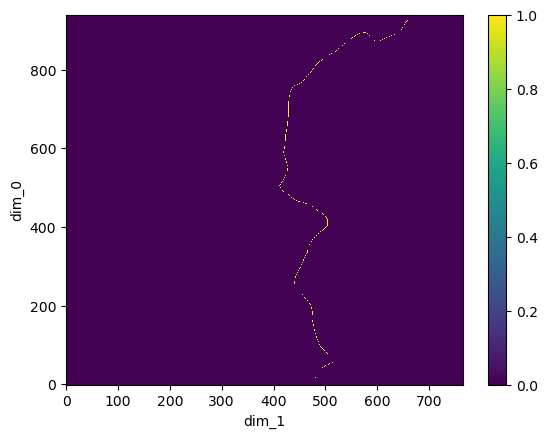

In [17]:
rasterized_xrs[0].plot.imshow()
# 1. Original polyline shape file

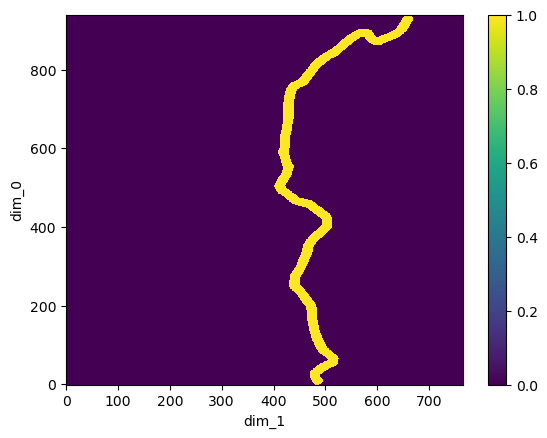

In [18]:
rasterized_xrs[1].plot.imshow()
# 2. Buffered polyline
# The pixel class labels are correct

(4)	Now, you are able to group the image pixels into two classes, stream pixels and non-stream pixels. The pixel band values (R,G,B,NIR) are features. Please convert the data to a table of records format: each record (row) is one pixel, the columns include Red, Green, blue, and nir bands, as well as the class label. In this format, you can call a machine learning library to train a classification model.

In [19]:
import numpy as np

rows = image.shape[1]
cols = image.shape[2]

vals = np.zeros((rows * cols, 5))

stream_xr = rasterized_xrs[1]

for row in range(rows):
    for col in range(cols):
        vals[row * cols + col, :4] = image[:, row, col]
        vals[row * cols + col, 4] = stream_xr[row, col]

In [20]:
np.savetxt("stream.csv", vals, delimiter=",")

## Part C: Cropping

(1)	Sometimes, we may need to divide an image into smaller chunks (e.g., 224 pixels by 224 pixels non-overlapping windows). How to divide the image data into smaller chunks and put results as a 4D array? (The four dimensions in the 4-D array correspond to chunk_id, width, height, color_band.)

In [21]:
# Calculate the number of chunks per row and chunks per column.
# Iterate over the 224x224 slice for each chunk row/column.
# For each chunk_row/chunk_col, let the chunk_id be (chunk_row * chunk_cols + chunk_col)
# Store the vector of chunk_id, width, height, color_band for each pixel.

import math

w = image.rio.width
h = image.rio.height

chunks_per_row = math.ceil(w / 224)
chunks_per_col = math.ceil(h / 224)

chunk_data = np.zeros((chunks_per_row * chunks_per_col, w, h, 4))

for x in range(0, w, 224):
    for y in range(0, h, 224):
        xm = min(x+224, w)
        ym = min(y+224, h)
        chunk_data[(x*chunks_per_row + y) // 224, x:xm, y:ym, 0] = (x*w + y) / 224
        chunk_data[(x*chunks_per_row + y) // 224, x:xm, y:ym, :] = image[:, y:ym, x:xm].transpose("x", "y", "band")

(2)	After step (1), we may also be interested in clipping the polyline shape files of the streams corresponding to different small image chunks (224 by 224 windows). How can you partition the polyline files into smaller files (each file corresponding to the shape segment in one image chunk)? The results should be several polyline shape files, one file for each chunk. //Hint: one potential strategy is to first identify the spatial extent for each chunk and then use clipping function.

In [57]:
for x in range(0, w, 224):
    for y in range(0, h, 224):
        chunk_id = (x*chunks_per_row + y) // 224
        
        # Determine spatial extent of chunk
        xm = min(x+224, w)
        ym = min(y+224, h)
        p1 = img.transform * (x, y)
        p2 = img.transform * (xm, ym)
        bounds = (p1[0], p2[0], p1[1], p2[1])
        
        chunk = polyline_to_image_crs.clip_by_rect(*bounds)
        chunk = chunk[chunk.geom_type != "GeometryCollection"]
        if len(chunk) > 0:
            chunk.to_file(f"chunk_{chunk_id}")